<h3 style="text-align: center;"><strong>Wine Quality Analysis and Factor Analysis</strong></h3>


<!-- ![Red Wine Quality and Statistical Analysis](Redwine_bg2.png) -->
![Red Wine Quality and Statistical Analysis](https://storage.googleapis.com/kaggle-datasets-images/4458/6836/30587db9a40233164f65a4a3f148f40d/dataset-cover.jpg?t=2017-11-12-14-28-34)


## **Introduction to Red Wine Quality Analysis**

The analysis of red wine quality is a critical area of study within machine learning, particularly in the context of the wine industry, where quality directly impacts consumer preferences and market pricing. This analysis utilizes various physio-chemical properties of red wine as predictors of quality, providing insights that can assist vintners and producers in enhancing their wine production processes.

In this study, we will analyze the following features of the dataset:

**Fixed Acidity**: A measure of non-volatile acids in wine, contributing to its taste and stability.  
**Volatile Acidity**: Represents acetic acid levels in wine; high levels can lead to spoilage.  
**Citric Acid**: Impacts freshness and contributes to the overall flavor of the wine.  
**Residual Sugar**: The amount of sugar remaining after fermentation, affecting sweetness.  
**Chlorides**: Salt content, which can influence flavor.  
**Free Sulfur Dioxide**: A preservative that helps prevent oxidation and microbial growth.  
**Total Sulfur Dioxide**: Represents the total amount of sulfur dioxide, both free and bound.  
**Density**: A measurement of mass per unit volume, correlating with sugar content.  
**pH**: A scale measuring the acidity or alkalinity of the wine, affecting taste and stability.  
**Sulphates**: Contributes to the taste and quality, acting as preservatives.  
**Alcohol**: The ethanol content, influencing the flavor and body of the wine.  

## **Methodology**


To predict red wine quality, we will fit Random Forest model using the aforementioned features. The goal is to establish a baseline performance for the model using given physiochemical features.

**Modeling Using Factor Analysis**  
After establishing initial model, we will perform Factor Analysis. This statistical method allows us to identify underlying relationships between the variables by reducing the number of dimensions. By grouping correlated features into factors, we can simplify the dataset, reduce noise.

**Factor analysis** will help us uncover latent structures within the data, which could lead to more interpretable and effective models. This approach not only aids in dimensionality reduction but also enhances the understanding of the interactions among the different chemical properties affecting red wine quality.

### **Steps involved in this process are:**  

1. Setting up Environment  
2. Data Preprocessing  
3. Exploratory Data Analysis  
   a. Descriptive analysis on the features  
   b. Outlier Analysis  
4. Treating the outlier  
   a. Log and Square Transformation  
   b. Capping
   b. Key terminologies
5. Buidling a Baseline Model
6. Introduction to Factor Analysis  
   a. What is Factor analysis  
   b. Key terminologies  
   c. How it may help us in this example  
7. Implementation of Factor analysis  
   a. Checking the suitability for the Factor analysis  
   b. Scaling the feature  
   c. Deciding the number of factors  
   d. Performing the Factor analysis  
   e. Interpretation of the analysis  
8. Final Model buidling by using factors  
9. Conclusion  



## 1. Setting up Environment


In [1]:
# Importing the libraries to begin with. Libraries are imported in between as well based on requirement

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from scipy.stats import norm

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

## 2. Data Preprocessing


In [3]:

# Loading the input data


data = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## 3. Exploratory Data Analysis

#### a. Descriptive analysis on the features

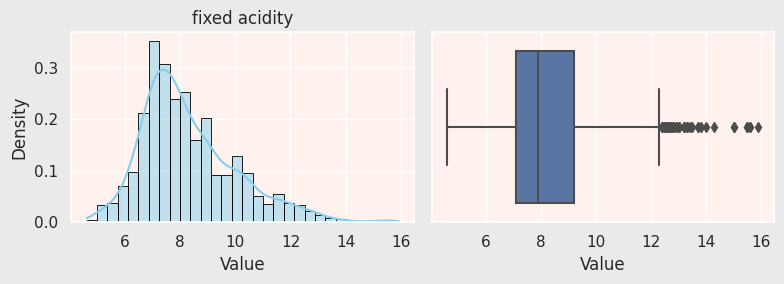



+---------------+---------+---------+--------+-------+-------+-------+-------+-------+
|               |   count |    mean |    std |   min |   25% |   50% |   75% |   max |
+===============+=========+=========+========+=======+=======+=======+=======+=======+
| fixed acidity |    1599 | 8.31964 | 1.7411 |   4.6 |   7.1 |   7.9 |   9.2 |  15.9 |
+---------------+---------+---------+--------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



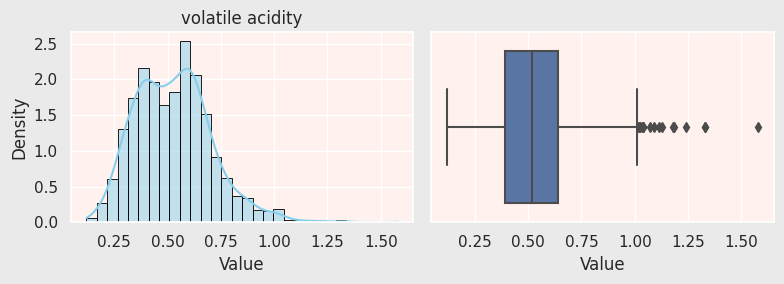



+------------------+---------+----------+---------+-------+-------+-------+-------+-------+
|                  |   count |     mean |     std |   min |   25% |   50% |   75% |   max |
+==================+=========+==========+=========+=======+=======+=======+=======+=======+
| volatile acidity |    1599 | 0.527821 | 0.17906 |  0.12 |  0.39 |  0.52 |  0.64 |  1.58 |
+------------------+---------+----------+---------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



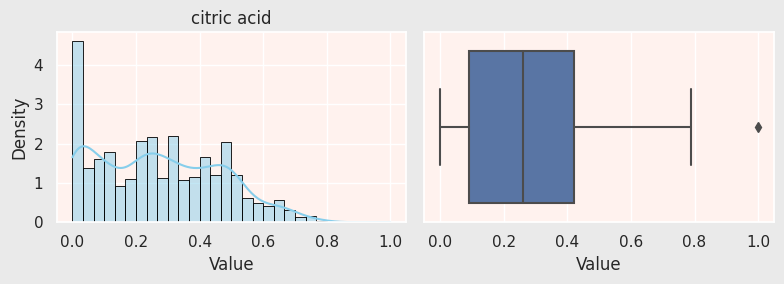



+-------------+---------+----------+----------+-------+-------+-------+-------+-------+
|             |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
+=============+=========+==========+==========+=======+=======+=======+=======+=======+
| citric acid |    1599 | 0.270976 | 0.194801 |     0 |  0.09 |  0.26 |  0.42 |     1 |
+-------------+---------+----------+----------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



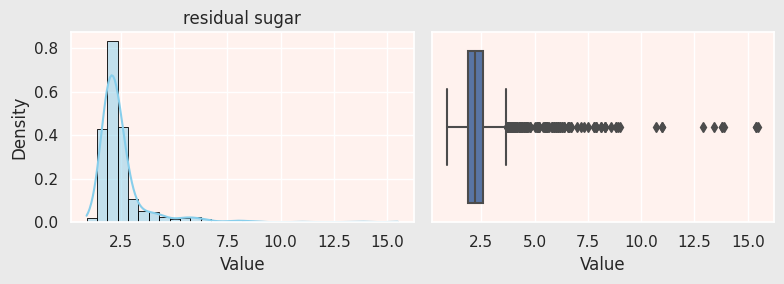



+----------------+---------+---------+---------+-------+-------+-------+-------+-------+
|                |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
+================+=========+=========+=========+=======+=======+=======+=======+=======+
| residual sugar |    1599 | 2.53881 | 1.40993 |   0.9 |   1.9 |   2.2 |   2.6 |  15.5 |
+----------------+---------+---------+---------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



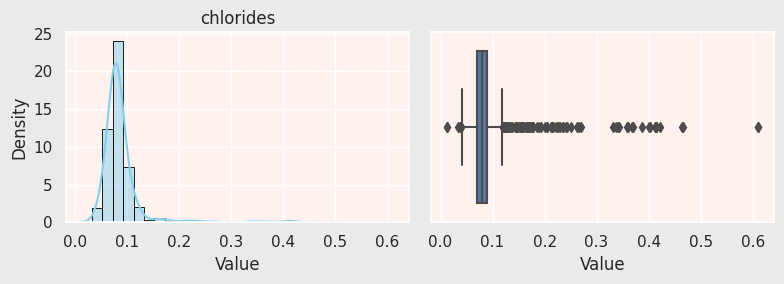



+-----------+---------+-----------+-----------+-------+-------+-------+-------+-------+
|           |   count |      mean |       std |   min |   25% |   50% |   75% |   max |
+===========+=========+===========+===========+=======+=======+=======+=======+=======+
| chlorides |    1599 | 0.0874665 | 0.0470653 | 0.012 |  0.07 | 0.079 |  0.09 | 0.611 |
+-----------+---------+-----------+-----------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



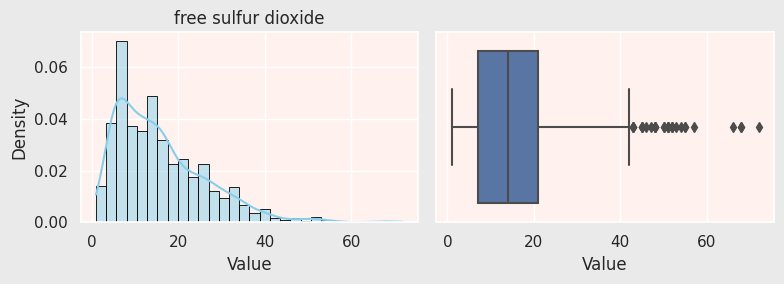



+---------------------+---------+---------+---------+-------+-------+-------+-------+-------+
|                     |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
+=====================+=========+=========+=========+=======+=======+=======+=======+=======+
| free sulfur dioxide |    1599 | 15.8749 | 10.4602 |     1 |     7 |    14 |    21 |    72 |
+---------------------+---------+---------+---------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



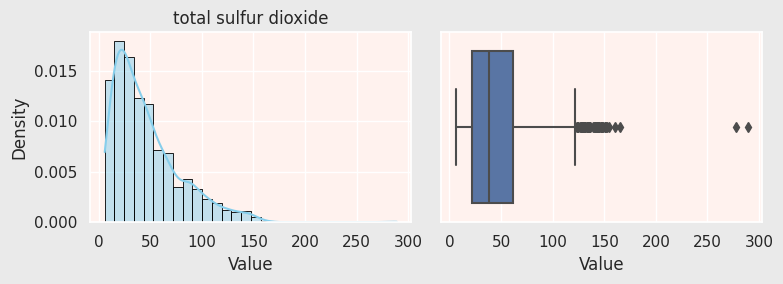



+----------------------+---------+---------+---------+-------+-------+-------+-------+-------+
|                      |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
+======================+=========+=========+=========+=======+=======+=======+=======+=======+
| total sulfur dioxide |    1599 | 46.4678 | 32.8953 |     6 |    22 |    38 |    62 |   289 |
+----------------------+---------+---------+---------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



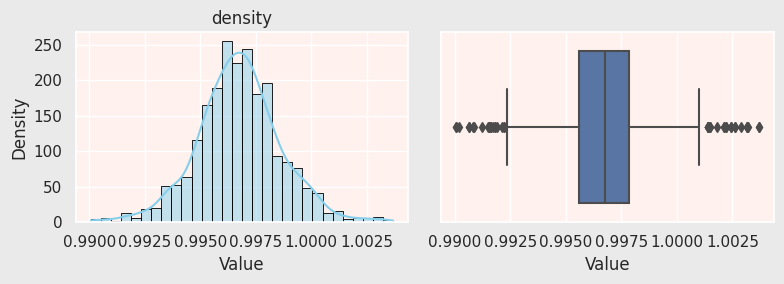



+---------+---------+----------+------------+---------+--------+---------+----------+---------+
|         |   count |     mean |        std |     min |    25% |     50% |      75% |     max |
+=========+=========+==========+============+=========+========+=========+==========+=========+
| density |    1599 | 0.996747 | 0.00188733 | 0.99007 | 0.9956 | 0.99675 | 0.997835 | 1.00369 |
+---------+---------+----------+------------+---------+--------+---------+----------+---------+

____________________________________________________________________________________________________________________________________



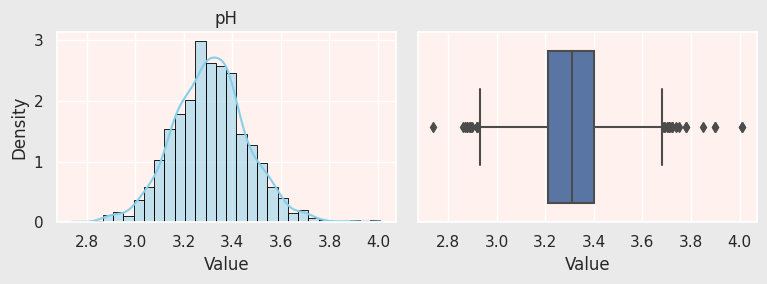



+----+---------+---------+----------+-------+-------+-------+-------+-------+
|    |   count |    mean |      std |   min |   25% |   50% |   75% |   max |
+====+=========+=========+==========+=======+=======+=======+=======+=======+
| pH |    1599 | 3.31111 | 0.154386 |  2.74 |  3.21 |  3.31 |   3.4 |  4.01 |
+----+---------+---------+----------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



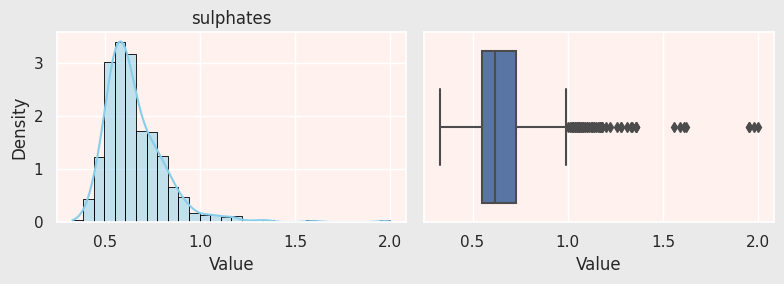



+-----------+---------+----------+----------+-------+-------+-------+-------+-------+
|           |   count |     mean |      std |   min |   25% |   50% |   75% |   max |
+===========+=========+==========+==========+=======+=======+=======+=======+=======+
| sulphates |    1599 | 0.658149 | 0.169507 |  0.33 |  0.55 |  0.62 |  0.73 |     2 |
+-----------+---------+----------+----------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



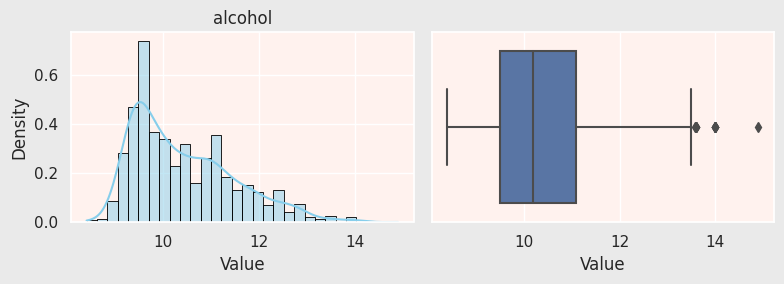



+---------+---------+--------+---------+-------+-------+-------+-------+-------+
|         |   count |   mean |     std |   min |   25% |   50% |   75% |   max |
+=========+=========+========+=========+=======+=======+=======+=======+=======+
| alcohol |    1599 | 10.423 | 1.06567 |   8.4 |   9.5 |  10.2 |  11.1 |  14.9 |
+---------+---------+--------+---------+-------+-------+-------+-------+-------+

____________________________________________________________________________________________________________________________________



In [6]:
#
# Plotting Distribution plot and box plot for visualizing the distribution of features
#

df = data.iloc[:,:-1]

for feature in df.columns:

    sns.set(rc={'axes.facecolor':'#FFF2EE', 'figure.facecolor':'#EAEAEA'})
    # Generate random data
    # print(f"{feature} distribution analysis using histogram and boxplot")
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    
    # Plot histogram on the first subplot
    sns.histplot(df[feature], bins=30, kde=True, stat='density', ax=axes[0],color='skyblue', edgecolor='black')
    axes[0].set_title(feature)
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    
    # Plot boxplot on the second subplot
    sns.boxplot(x=df[feature], ax=axes[1])
    # axes[1].set_title(feature)
    axes[1].set_xlabel('Value')

    # Adjust layout
    plt.tight_layout()
    sns.set_style("darkgrid")
    plt.show()
    print()
    print()

    summary = pd.DataFrame(df[feature].describe()).T
    print(tabulate(summary, headers='keys',  tablefmt="grid"))
    print()
    print("____________________________________________________________________________________________________________________________________")
    print()


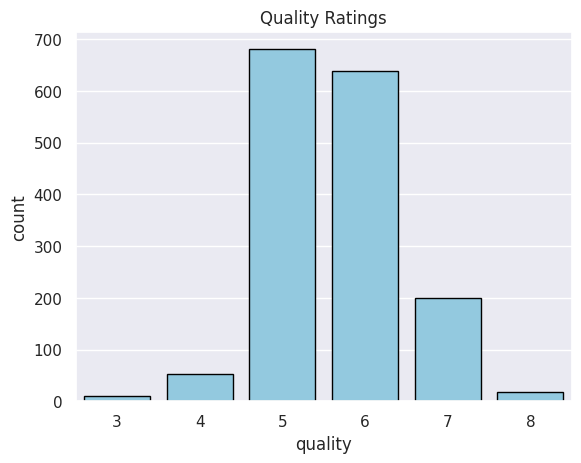

In [7]:
# Plotting the countplot for Quality feature

sns.countplot(x = data["quality"], color='skyblue', edgecolor='black')
plt.title("Quality Ratings")
# Adjust layout
sns.set_style("darkgrid")
plt.show()


##### Feature Creation

Creating a binary variable which will define if the wine is good or bad based on rating. If the rating is more the 6.5 lets call it Good otherwise will call it bad.



In [8]:
data["Quality_class"] = np.where(data['quality']>6.5,"Good","Bad")

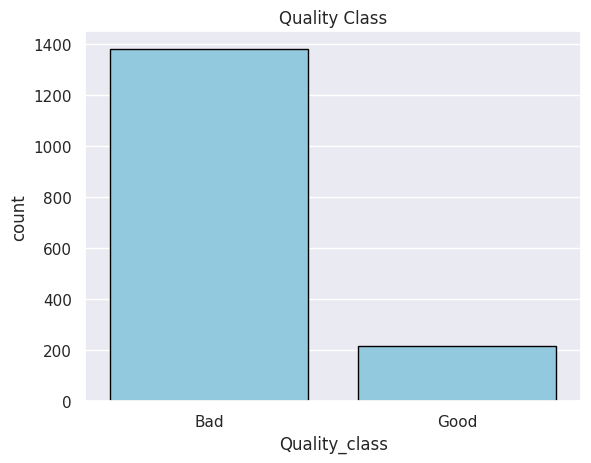

In [9]:
# Plotting the countplot for Quality Class

sns.countplot(x = data["Quality_class"],  color='skyblue', edgecolor='black')
plt.title("Quality Class")
# Adjust layout
sns.set_style("darkgrid")
plt.show()


***The data seems to be having outliers in most of the features.***    
We will have a detailed view of the distribution of data to identify where these outliers are present.   
Based on the observation we will decide the approach to handle these outliers 

***The Target data is highly imbalanced.***  
We have a good amount of bad wine examples and very less number of Good wine examples.

But lets not do anything to balance the dataset, instead will use tree based algorithms to build the model.

Lets visualize the featrure values by seperating on whether they are good or bad.

In [10]:
for feature in data.columns[:-2]:
    # Create a subplot: 1 row, 2 columns (histogram on the left, boxplot on the right)
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Histogram of {feature}", f"Boxplot of {feature}"))

    # Histogram (left subplot)
    hist = px.histogram(data, x=feature, color="Quality_class", barmode="overlay", 
                        labels={feature: feature}, title=f"Histogram of {feature}")
    
    # Add the histogram to the first subplot
    for trace in hist.data:
        fig.add_trace(trace, row=1, col=1)

    # Boxplot (right subplot)
    box = px.box(data, x="Quality_class", y=feature, color="Quality_class", 
                 labels={feature: feature}, title=f"Boxplot of {feature}")
    
    # Add the boxplot to the second subplot
    for trace in box.data:
        fig.add_trace(trace, row=1, col=2)

    # Update layout
    fig.update_layout(height=400, width=700, title_text=f"Histogram and Boxplot of {feature}")
    
    # Show the figure for this feature
    fig.show()


We can see a clear separation of the values of the features in some of the features like "volatile acidity",  "Citric acid" and "alcohol".
Some other features seem to have very similar ranges for both good and bad examples, which is fine.

One helpful observation is most of the outliers seem to be bad examples, which could be because of an imbalance in the dataset. The features are expected to be in a broader range which could have happened in bad examples cases as we have so many, but as we have fewer examples for Bad class we might missing the examples with higher values.

**Most of the features are skewed towards the right.**  

Let's go into one more level deep and visualize the distribution for the ranks provided.


#### b. Outlier Analysis

In [11]:
# 


# Loop through each feature in the dataframe
for feature in data.columns[:-2]:
    # Create a subplot: 1 row, 2 columns (boxplot on the left, violin plot on the right)
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Boxplot of {feature} by Quality", f"Violin plot of {feature} by Quality"))

    # Boxplot (left subplot)
    box = px.box(data, x="quality", y=feature, color="quality", 
                 labels={feature: feature}, title=f"Boxplot of {feature} by Quality")

    # Add the boxplot to the first subplot
    for trace in box.data:
        fig.add_trace(trace, row=1, col=1)

    # Violin plot (right subplot)
    violin = px.violin(data, x="quality", y=feature, color="quality", box=True, 
                       labels={feature: feature}, title=f"Violin plot of {feature} by Quality")

    # Add the violin plot to the second subplot
    for trace in violin.data:
        fig.add_trace(trace, row=1, col=2)

    # Update layout
    fig.update_layout(height=400, width=700, title_text=f"Boxplot and Violin plot of {feature} by Quality")
    
    # Show the figure for this feature
    fig.show()
    


So it's evident that outliers are due to an imbalance in the target classes. We can see outliers for classes with 4,5,6 in most of the cases for which we have a good number of samples.

We can handle the outliers in a few different ways.
1. We can remove them (which results in loss of data, so let's not do it now)
2. Transforming the features such as log, square, etc ( But the transformation may not give better results in some time)
3. We can impute them with mean, median, or zero (This will suit for this example as this will not result in data loss )

We can use PowerTransformer from Scikit-learn which identifies the right base for the individual feature for the transformation and applies the same.  
Then we will also apply square transformation and compare the different versions of data to see how outliers are transformed.

## 4. Treating the outlier

#### a. Log and Square Transformation

In [12]:
# Transformation using PowerTransformer  

data_transformed_bc = data.copy()

pt = PowerTransformer(method='yeo-johnson')
for column in data_transformed_bc.columns[:-2]:

    data_transformed_bc[column] = pt.fit_transform(data_transformed_bc[[column]])


In [13]:
## Square Transformation

data_transformed_sq = data.copy()
for column in data_transformed_sq.columns[:-2]:

    data_transformed_sq[column] = data_transformed_sq[column]**2

    


In [14]:
# 
# Loop through each feature
for feature in data.columns[:-2]:
    # Create a subplot: 1 row, 3 columns (one for each DataFrame)
    fig = make_subplots(rows=1, cols=3, subplot_titles=(
        "Original Data", "Power Transformed Data", "Square Transformed Data"))

    # Boxplot for original data (left)
    box_original = px.box(data, x="quality", y=feature, color="quality", 
                          labels={feature: feature}, title="Original Data")
    for trace in box_original.data:
        fig.add_trace(trace, row=1, col=1)

    # Boxplot for power-transformed data (center)
    box_bc = px.box(data_transformed_bc, x="quality", y=feature, color="quality", 
                    labels={feature: feature}, title="Power Transformed Data")
    for trace in box_bc.data:
        fig.add_trace(trace, row=1, col=2)

    # Boxplot for square-transformed data (right)
    box_sq = px.box(data_transformed_sq, x="quality", y=feature, color="quality", 
                    labels={feature: feature}, title="Square Transformed Data")
    for trace in box_sq.data:
        fig.add_trace(trace, row=1, col=3)

    # Update the layout of the plot
    fig.update_layout(height=450, width=700, title_text=f"Boxplots of {feature} with Hue on 'quality'")

    # Show the figure for the current feature
    fig.show()



As we can see the Power Transformation helped the data slightly, but square transformation has worsened the outlier in features like Chlorides.  
So we can say the transformations are not helping us in handling the outliers in this example.

(The transformation will make sense for use cases. Here though they are helping in some use cases they might help and they even may be valid transformations, so always we have to choose it carefully)

**Let's now try out the imputation method for handling these outliers.**  

First, we have to identify the range of values beyond which we can call the values outliers.  
As the statistical standard and common practice, I'm choosing anything beyond +- 1.5 of the IQR range as the outliers.

Let's identify these values and then impute them with median values. (As medians will not be affected by outliers)

#### b. Capping / Imputation

In [15]:
data_imputed = data.copy()


In [16]:
def impute_median(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    # calculating IQR range

    IQR = q3 - q1

    # Defining outliers boundaries

    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR

    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)

    # Imputing
    median = df[column].median()
    df.loc[outliers,column] = median
    

    

In [17]:
for column in data_imputed.columns[:-2]:
    impute_median(data_imputed,column)

Now lets compare the results of imputation

In [18]:
# # Loop through each feature
for feature in data_imputed.columns[:-2]:
    # Create a subplot: 1 row, 3 columns (one for each DataFrame)
    fig = make_subplots(rows=1, cols=2, subplot_titles=(
        "Original Data", "Imputed Data"))

    # Boxplot for original data (left)
    box_original = px.box(data, x="quality", y=feature, color="quality", 
                          labels={feature: feature}, title="Original Data")
    for trace in box_original.data:
        fig.add_trace(trace, row=1, col=1)

    # Boxplot for power-transformed data (center)
    box_bc = px.box(data_imputed, x="quality", y=feature, color="quality", 
                    labels={feature: feature}, title="Power Transformed Data")
    for trace in box_bc.data:
        fig.add_trace(trace, row=1, col=2)

  
    # Update the layout of the plot
    fig.update_layout(height=400, width=700, title_text=f"Boxplots of {feature} with Hue on 'quality'")

    # Show the figure for the current feature
    fig.show()
    
    

#     print("________________________________________________________________________________________________________________")
#     print()


***Now the results on the right (imputed values) looks lot better.*** 

**So, now we will look at the correlation matrix as to check how each of these features are related to each other**

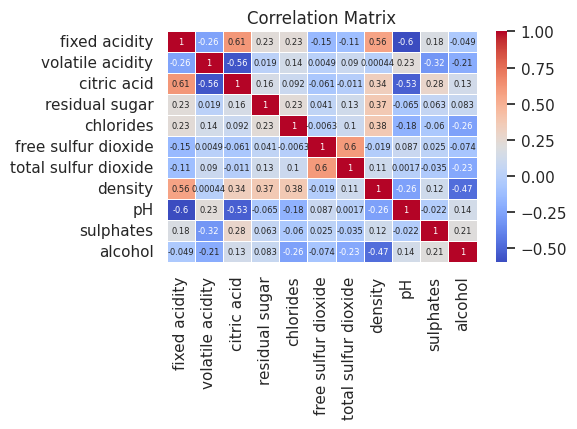

In [19]:
corr_matrix = data_imputed.iloc[:,:-2].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5,annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()


As we can see the features holds some level of correlation with each other which also makes sense for the dataset. Example acidity and pH are correlated generally, so a strong correlation between them is expected.

## 5. Building baseline model

In [20]:
models_results = pd.DataFrame()

In [21]:
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score


In [22]:
data_imputed = data_imputed.drop(columns=['quality'])

data_imputed['Quality_class'] = np.where(data_imputed['Quality_class']=="Good",1,0)

x = data_imputed.iloc[:,:-1]
y = data_imputed['Quality_class'] 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Accuracy: 0.890625
Confusion Matrix:
[[262  11]
 [ 24  23]]
AUC Score: 0.9347283921752007


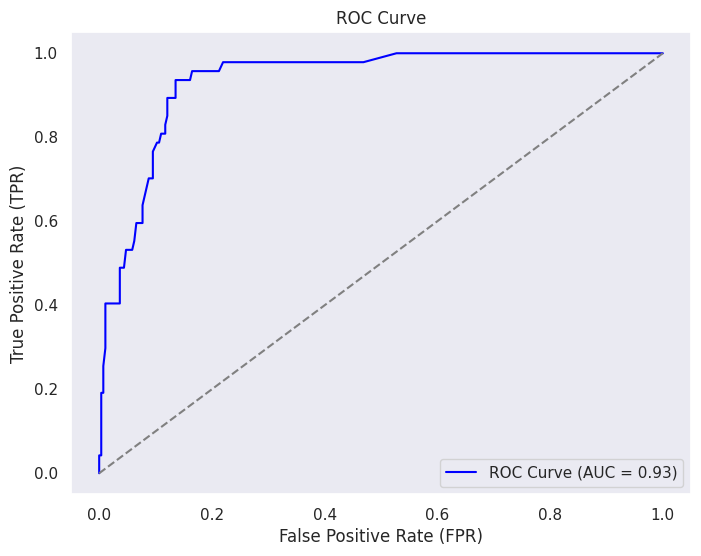

In [24]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed Evaluation - Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,output_dict=True)

print(f"Confusion Matrix:\n{conf_matrix}")
# print(f"Classification Report:\n{class_report}")

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for no-skill classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [25]:
metrics = {
        'Version': "Baseline",
        'Model':'Logistic Refression',
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1 Score': class_report['weighted avg']['f1-score'],
        'Accuracy': accuracy,
        'AUC Score':auc_score
            
    }

In [26]:
models_results = pd.concat([models_results,pd.DataFrame(metrics,index=[0])])


## 6. Introduction to Factor Analysis



**Factor Analysis** is a statistical method used to identify underlying relationships between variables. It aims to reduce the complexity of a dataset by transforming a large number of observed variables into a smaller set of unobserved factors, which capture the underlying structure of the data. This technique is particularly useful when you have a lot of variables, but you're interested in discovering which of these are correlated and can be grouped into broader, more interpretable factors.

#### Key Terminologies in Factor Analysis

1. **Factors**: These are the latent variables that explain the correlations among observed variables. They represent broader dimensions or concepts that influence the measured data.

2. **Factor Loadings**: These are the coefficients that show the relationship between each observed variable and the factors. A high loading means the variable strongly contributes to the factor.

3. **Eigenvalues**: These indicate the amount of variance explained by each factor. Factors with higher eigenvalues explain more of the data variance and are more significant.

4. **Communality**: This is the proportion of variance in each observed variable that is explained by the factors. High communalities mean the factor model is a good fit for the data.

5. **Exploratory Factor Analysis (EFA)**: This is used when you're unsure about the number of factors. The goal is to explore the dataset to find latent structures without prior assumptions.

6. **Confirmatory Factor Analysis (CFA)**: Used when you have a theoretical model about how the variables should relate to the factors. This technique tests the fit of your proposed factor structure.

7. **Rotation**: This is a mathematical technique used to make the factor loadings easier to interpret. Common types of rotations are **Varimax** (which simplifies the factors) and **Oblimin** (which allows factors to be correlated).

---

#### Why Factor Analysis is Useful for Wine Quality Analysis

In wine quality analysis, especially when you have only **physicochemical data** (such as acidity, alcohol content, sugar levels, etc.), it becomes challenging to interpret each variable independently. Factor analysis is highly valuable in this context for several reasons:

1. **Reducing Complexity**: Physicochemical data often contains many variables that are correlated with each other. Factor analysis can group these variables into a few key factors, which might represent broader characteristics like **overall acidity**, **alcohol strength**, or **aromatic profile**.

2. **Identifying Key Quality Components**: Since wine quality is influenced by multiple interacting factors (e.g., sugar and alcohol content, pH, and acidity), factor analysis helps to reveal which combinations of these characteristics contribute the most to quality.

3. **Dimensionality Reduction**: Factor analysis reduces the number of variables that need to be analyzed, making it easier to develop predictive models for wine quality. Instead of handling 10+ variables, you might only need to consider 2-3 underlying factors.

4. **Interpretation of Sensory Qualities**: Even though physicochemical properties do not directly measure taste, aroma, or texture, factor analysis can help correlate these measurable properties with latent sensory qualities that impact wine quality, making the results more interpretable for winemakers and analysts.

In conclusion, using factor analysis on physicochemical data in wine quality analysis provides a clearer picture of how different chemical properties interact and influence the overall perception of quality, helping producers optimize their products.

In [27]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=dddd30b8f617e772b058c72d63f7c831e86f8e55c25e65361e6ad30927c4b1f7
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


## 7. Implementation of Factor analysis

#### Steps for Implementing Exploratory Factor Analysis (EFA) and Model Fitting

In this scenario, you are using **Exploratory Factor Analysis (EFA)** instead of Principal Component Analysis (PCA) to extract factors. Once the factors are derived, you will use these factors as inputs to build Random Forest and Logistic Regression models, then compare their performance against a baseline model.

---

#### Steps for EFA and Model Fitting

#### **Step 1: Data Collection**
- Collect your dataset with observed variables. In a wine quality analysis, these variables might include physicochemical properties such as pH, volatile acidity, fixed acidity, alcohol content, residual sugar, etc.

#### **Step 2: Assess Data Suitability for EFA**
- Before conducting EFA, ensure your data is appropriate by checking the following:
  - **Kaiser-Meyer-Olkin (KMO) Test**: Measures sampling adequacy. KMO > 0.6 indicates suitability for factor analysis.
  - **Bartlett’s Test of Sphericity**: Tests whether correlations between variables are sufficient for factor analysis. A significant result (p < 0.05) supports proceeding with EFA.
  - **Correlation Matrix**: Check for adequate correlations (> 0.3) between variables.

#### **Step 3: Perform Exploratory Factor Analysis (EFA)**
- Use EFA to identify latent factors from the observed variables. In EFA, you do not impose any structure beforehand and aim to explore the underlying relationships.
  
  - **Factor Extraction Method**: Use a method like **Maximum Likelihood** or **Principal Axis Factoring** to extract the factors.
  
  - **Decide Number of Factors**:
    - Look at the **Eigenvalues** (retain factors with eigenvalues > 1).
    - Use the **Scree Plot** to visually determine the optimal number of factors (retain factors before the "elbow" point).
    - Check the **Cumulative Variance Explained** to ensure the factors explain a substantial portion (60-70%) of the variance.

#### **Step 4: Rotate the Factors**
- Perform **factor rotation** to make the factor structure more interpretable:
  - **Varimax Rotation** (for uncorrelated factors) or **Oblimin Rotation** (for correlated factors) based on whether you expect the factors to be correlated.

#### **Step 5: Interpret the Factors**
- After rotation, inspect the **factor loadings** to determine which variables load onto which factors:
  - Variables with loadings above ±0.5 on a factor are considered significant contributors to that factor.
  - Label each factor based on the variables with high loadings (e.g., a factor loading on volatile acidity and pH could be labeled **Acidity**).
  
  Example of factors in a wine quality analysis:
  - **Factor 1**: Acidity-related variables like fixed acidity, volatile acidity, and pH.
  - **Factor 2**: Alcohol-related variables like alcohol content, residual sugar, and free sulfur dioxide.
  
#### **Step 6: Compute Factor Scores**
- **Factor Scores** are derived from the factors. These scores represent the contribution of each factor to each observation in the dataset. The factor scores are the new variables that will be used in the predictive models (Random Forest, Logistic Regression).

---

#### Fitting Predictive Models Using Factor Scores

#### **Step 7: Build the Baseline Models**
- Before using factor scores, establish baseline models with the original observed variables (physicochemical properties).
  - **Baseline Logistic Regression**: Predicts wine quality based on the original physicochemical variables.
  - **Baseline Random Forest**: Uses the original variables to predict wine quality.

#### **Step 8: Fit Logistic Regression Using Factor Scores**
- Use the factor scores (instead of original variables) as inputs to a Logistic Regression model.
  - **Logistic Regression** is suitable if the target is binary (e.g., high quality vs. low quality).
  - Compare this model's performance to the baseline logistic regression model by assessing metrics like accuracy, AUC (Area Under the ROC Curve), precision, and recall.

#### **Step 9: Fit Random Forest Using Factor Scores**
- Use the factor scores as inputs to a Random Forest model.
  - Random Forest is a non-linear, ensemble method that can capture complex relationships between factors and the target variable.
  - Compare this model's performance against the baseline Random Forest using metrics like accuracy, precision, and feature importance.

#### **Step 10: Model Comparison**
- Compare the performance of the models:
  - **Baseline Models** (built on original variables) vs. **Factor-Based Models** (built on factor scores).
  - Compare performance metrics such as:
    - **Accuracy**: The proportion of correct predictions.
    - **AUC-ROC**: How well the model discriminates between classes.
    - **Precision and Recall**: For evaluating class-specific performance.
    - **F1-Score**: The harmonic mean of precision and recall.
  - If factor-based models perform similarly or better, it indicates that EFA effectively reduced data complexity without sacrificing prediction accuracy.

#### **Step 11: Feature Importance (Random Forest)**
- Analyze **feature importance** from the Random Forest model. Factor scores that are more important give insights into which latent factors (e.g., Acidity, Alcohol Content) most strongly influence wine quality.
  - If Factor 1 (Acidity) has the highest importance, it suggests that acidity-related characteristics are key drivers of wine quality in the dataset.

---




In [28]:
factor_data = data_imputed.iloc[:,:-2]

In [29]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo

In [30]:
## Checking the suitability to perform factor analysis

# Bartlett test to check if the variables are correlated
chi_square_value, p_value = calculate_bartlett_sphericity(factor_data)

print(f"p-value of Bartlett test - {p_value}")

p-value of Bartlett test - 0.0


**p_value which is less than 0.05 indicates the features are well correlated to perform the factor analysis**

In [31]:
## KMO test for checking data sufficiency

kmo_all,kmo_model = calculate_kmo(factor_data)

print(f"KMO : {kmo_model}")

KMO : 0.6727432513300392


**KMO value greater than 0.6 indicates we have just enough data to perform the factor analysis**

In [32]:
## Transforming the data

scaler = StandardScaler()
data_scaled = scaler.fit_transform(factor_data)

In [33]:
## Performing the factor analysis to extract the Eigenvalues

fa = FactorAnalyzer(n_factors=len(factor_data.columns),rotation=None)
fa.fit(data_scaled)



FactorAnalyzer(n_factors=10, rotation=None, rotation_kwargs={})

In [34]:
# Get Eigenvalues

eigenvalues,_ = fa.get_eigenvalues()

In [35]:
eigenvalues

array([2.90483805, 1.76071685, 1.47952306, 1.01379973, 0.73496258,
       0.64094054, 0.51880722, 0.40134318, 0.29379579, 0.25127299])

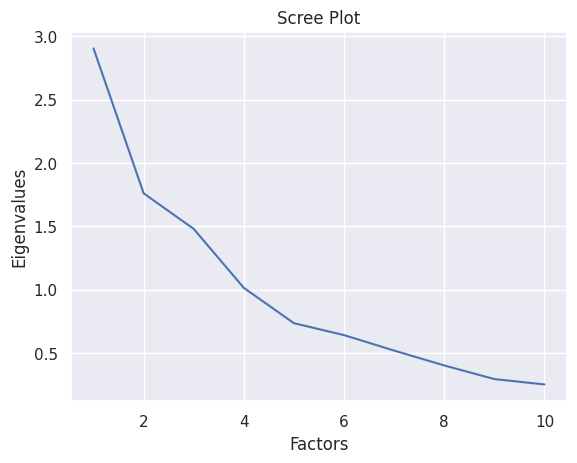

In [36]:
# Plotting eigenvalues

plt.plot(range(1,len(eigenvalues)+1),eigenvalues)
plt.title("Scree Plot")
plt.xlabel("Factors")
plt.ylabel("Eigenvalues")
plt.show()

**By looking at Eigenvalues and at above plot we can go with 4 factors.**

In [37]:
## We can go with 4 Eigenvalues which are greater then 1


# Now that we have decided the number of factors we can perform actual factor analysis
np.random.seed(42)

fa = FactorAnalyzer(n_factors=4,rotation="oblimin")

fa.fit(data_scaled)

# Get the loadings

loadings = fa.loadings_



In [38]:
print(pd.DataFrame(loadings,columns=[f"Factor_{i}" for i in range(1,5)],index=factor_data.columns))

                      Factor_1  Factor_2  Factor_3  Factor_4
fixed acidity         0.475064 -0.132769  0.205447 -0.382829
volatile acidity      0.123468  0.002609 -0.815300 -0.029632
citric acid           0.210857  0.017407  0.622153 -0.263228
residual sugar        0.488848  0.081161 -0.000908  0.116395
chlorides             0.432973  0.044642 -0.241595 -0.123639
free sulfur dioxide  -0.059141  0.609343  0.089294  0.094453
total sulfur dioxide  0.024830  0.996288 -0.010949 -0.035206
density               0.867586  0.025139 -0.016226  0.042937
pH                    0.027934 -0.020950 -0.009260  0.903805
sulphates             0.139910 -0.004256  0.472041  0.225151


Based on the loadings for **Factors 1 through 4**, we can interpret and name each factor reflecting the underlying dimensions they represent in the context of wine quality analysis. Here’s a detailed breakdown:


#### Factor Interpretations and Suggested Names

#### **Factor 1: Body and Structure**
- **Strong Positive Loadings**: Density (0.868), Residual Sugar (0.489), Chlorides (0.433)
- **Interpretation**: This factor reflects the body and structure of the wine, with density being a major contributor, alongside moderate influences from residual sugar and chlorides.
- **Suggested Name**: **Body and Structure Factor**

#### **Factor 2: Preservation and Sulfur Dioxide**
- **Strong Positive Loading**: Total Sulfur Dioxide (0.996), Free Sulfur Dioxide (0.609)
- **Interpretation**: This factor primarily relates to the preservation aspects of the wine, highlighting the importance of sulfur dioxide in preventing spoilage.
- **Suggested Name**: **Preservation Factor**

#### **Factor 3: Acidity and Freshness**
- **Strong Positive Loading**: Citric Acid (0.622)
- **Strong Negative Loading**: Volatile Acidity (-0.815)
- **Interpretation**: This factor emphasizes the freshness associated with citric acid and the negative influence of volatile acidity, indicating spoilage or undesirable characteristics in the wine.
- **Suggested Name**: **Acidity and Freshness Factor**

#### **Factor 4: pH and Texture**
- **Strong Positive Loading**: pH (0.904)
- **Interpretation**: This factor highlights the role of pH in the wine's profile, suggesting a relationship between acidity, texture, and overall mouthfeel.
- **Suggested Name**: **pH and Texture Factor**



In [39]:
## Check the communalities

communalities = fa.get_communalities()

print(pd.DataFrame(communalities,columns=['Communalities'],index = factor_data.columns))

                      Communalities
fixed acidity              0.432080
volatile acidity           0.680843
citric acid                0.501127
residual sugar             0.259108
chlorides                  0.263113
free sulfur dioxide        0.391692
total sulfur dioxide       0.994565
density                    0.755444
pH                         0.818169
sulphates                  0.293109


In [40]:
## Checking the variances explained by each factor
variance = fa.get_factor_variance()

variance_df = pd.DataFrame({
    'Variance Explained': variance[1],
    'Cumulative Variance': variance[2]
}, index=[f'Factor {i+1}' for i in range(len(variance[0]))])

print(variance_df)


          Variance Explained  Cumulative Variance
Factor 1            0.148900             0.148900
Factor 2            0.139149             0.288050
Factor 3            0.138363             0.426413
Factor 4            0.112512             0.538925


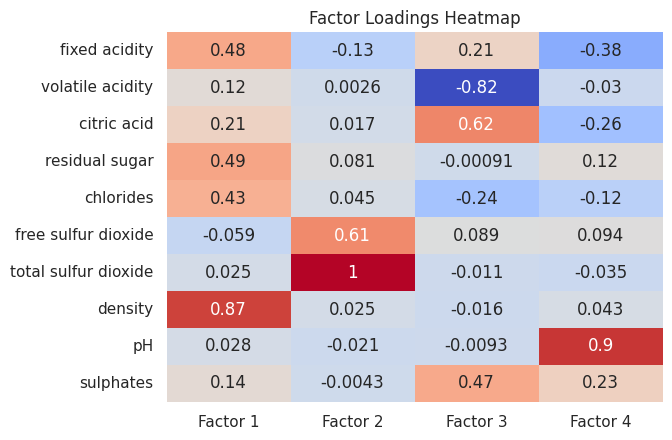

In [41]:
# Plot the factor loadings
sns.heatmap(pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3','Factor 4'], index=factor_data.columns),
            annot=True, cmap='coolwarm', cbar=False)
plt.title('Factor Loadings Heatmap')
plt.show()

## 8. Final Model buidling by using factors  


Lets create a dataframe with Factors as features 

In [42]:
factor_scores = np.dot(data_scaled, loadings)


In [43]:
# Convert factor scores to DataFrame for easier handling
factor_scores_df = pd.DataFrame(factor_scores, columns=['Body and Structure Factor','Preservation Factor','Acidity and Freshness Factor','pH and Texture Factor'])

# Display the factor scores
# print(factor_scores_df.head())

In [44]:
factor_scores_df_plot = factor_scores_df.copy()
factor_scores_df_plot['Quality'] = data_imputed['Quality_class']

In [45]:
# 

# Loop through each feature in the dataframe
for feature in factor_scores_df_plot.columns[:-1]:
    # Create a subplot: 1 row, 2 columns (histogram on the left, boxplot on the right)
    fig = make_subplots(rows=1, cols=2, subplot_titles=(f"Histogram of {feature}", f"Boxplot of {feature}"))

    # Histogram (left subplot)
    hist = px.histogram(factor_scores_df_plot, x=feature, color="Quality", barmode="overlay", 
                        labels={feature: feature}, title=f"Histogram of {feature}")
    
    # Add the histogram to the first subplot
    for trace in hist.data:
        fig.add_trace(trace, row=1, col=1)

    # Boxplot (right subplot)
    box = px.box(factor_scores_df_plot, x="Quality", y=feature, color="Quality", 
                 labels={feature: feature}, title=f"Boxplot of {feature}")
    
    # Add the boxplot to the second subplot
    for trace in box.data:
        fig.add_trace(trace, row=1, col=2)

    # Update layout
    fig.update_layout(height=400, width=700, title_text=f"Histogram and Boxplot of {feature}")
    
    # Show the figure for this feature
    fig.show()
    
    
    
# for feature in factor_scores_df_plot.columns[:-1]:

#     sns.set(rc={'axes.facecolor':'#FFF2EE', 'figure.facecolor':'#EAEAEA'})
#     # Generate random data
#     # print(f"{feature} distribution analysis using histogram and boxplot")
#     # Create a figure with two subplots
#     fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
#     # Plot histogram on the first subplot
#     sns.histplot(x=factor_scores_df_plot[feature], bins=30, kde=True, ax=axes[0],color='skyblue', edgecolor='black',hue=factor_scores_df_plot["Quality"], multiple='stack')
#     # sns.histplot(data=tips, x='total_bill', hue='sex', multiple='stack', bins=30, kde=True)

#     axes[0].set_title(feature)
#     axes[0].set_xlabel('Value')
#     axes[0].set_ylabel('Density')
    
#     # Plot boxplot on the second subplot
#     sns.boxplot(x=factor_scores_df_plot[feature], ax=axes[1],hue=factor_scores_df_plot["Quality"])
#     # axes[1].set_title(feature)
#     axes[1].set_xlabel('Value')

#     # Adjust layout
#     plt.tight_layout()
#     sns.set_style("darkgrid")
#     plt.show()

#     print()
#     print("________________________________________________________________________________________________________________")
#     print()


Accuracy: 0.88125
Confusion Matrix:
[[261  12]
 [ 26  21]]
AUC Score: 0.842607746863066


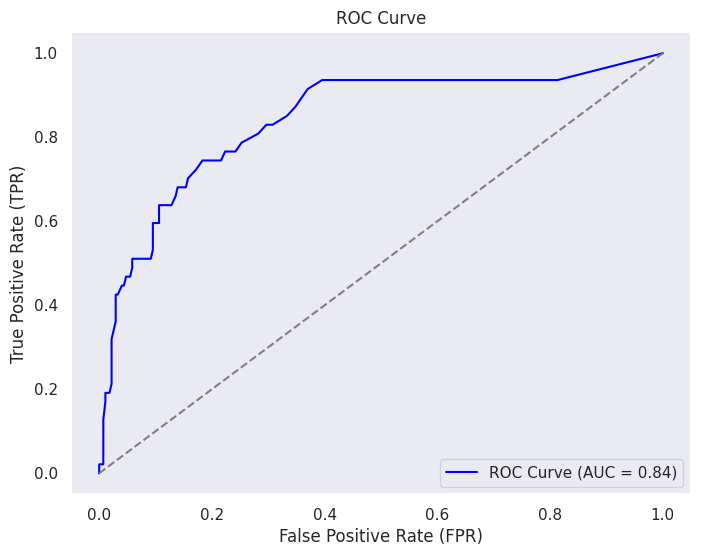

In [46]:

x = factor_scores_df.copy()
y = data_imputed['Quality_class'] 

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)


## Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed Evaluation - Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,output_dict=True)

print(f"Confusion Matrix:\n{conf_matrix}")
# print(f"Classification Report:\n{class_report}")

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score}")

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for no-skill classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [47]:
metrics = {
        'Version': "Final",
        'Model':'Random Forest',
        'Precision': class_report['weighted avg']['precision'],
        'Recall': class_report['weighted avg']['recall'],
        'F1 Score': class_report['weighted avg']['f1-score'],
        'Accuracy': accuracy,
        'AUC Score':auc_score
            
    }

In [48]:
models_results = pd.concat([models_results,pd.DataFrame(metrics,index=[0])])


In [49]:
models_results

,Version,Model,Precision,Recall,F1 Score,Accuracy,AUC Score
0,Baseline,Logistic Refression,0.880891,0.890625,0.883120,0.890625,0.934728
0,Final,Random Forest,0.869304,0.881250,0.872344,0.881250,0.842608


## 9. Conclusion

The Baseline model which we have built used 11 features, and we could able to achieve and Accuracy of 0.89. 
But in the final model just by using 4 features we are able to achieve 0.88 accuracy which signifies the effectiveness of the factors that we we extracted.

This clearly indicates the quality are predominantly judged by the such factors which we may not able to quantify directly. 
Using Factor analysis we are able to extract such hidden factors which makes the models robust and simple.



<!-- ![Red Wine Quality and Statistical Analysis](Redwine_bg2.png) -->
![Red Wine Quality and Statistical Analysis](https://t4.ftcdn.net/jpg/05/05/39/07/360_F_505390776_8ilykzGiVSpIjUqdEXFhDY1ACRJZPDRD.jpg)

